# Prosper Loan Data Exploration
## by Dayane Sallet

## Preliminary Wrangling
This dataset is composed of 113,937 loans and for each entry there are 81 variables. Those variables include loan amount, borrower rate, current loan status, borrower income, and many others.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# High-level overview of data shape and composition
# Display all columns and data types
pd.set_option('display.max_rows', 81)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
print(df.shape)
print(df.describe())

(113937, 81)
       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.18

There are variables with a lot of null values. Also, there are many variables which seem to be of institutional use and do not bring any useful information.  
There are many variables set as object type, which could be changed to facilitate its' usage.

### What is the structure of your dataset?

The data is structured in 113,937 loan entries in which each entry has 81 different variables. These variables are mostly numeric, however there are some categorical variables. 

Numeric variables are mainly values indicating total loan amount, yield, payment rates and overall rates. On the other hand, categorical variables indicate dates and characteristics of the borrowers.


### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset is to understand what factors influence the loan's status and what factors influence the payment of the loan.
This implies the analysis of the LoanStatus and its relation with some of the other variables.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
It is expected that the LoanStatus is affected by: Term, BorrowerRate, Occupation, EmploymentStatus, IsBorrowerHomeowner, CurrentDelinquencies, DelinquenciesLast7Years, DebtToIncomeRatio, IncomeRange, StatedMonthlyIncome, LoanOriginalAmount and MonthlyLoanPayment. Moreover, I expect that completed and current status are linked with a smaller number of terms, a lower borrower rate, a positive employment status, homeownership, no delinquencies, a small debt to income ratio, high income range and monthly income.  


#### Some useful modifications to the original data

In [5]:
df_loan = df.copy()
df_loan = df_loan.rename(columns={'ProsperRating (Alpha)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory'})

In [6]:
df_loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating',
       'ProsperScore', 'ListingCategory', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit'

In [7]:
variables = ['Term', 'LoanStatus', 'BorrowerRate','LenderYield', 'ListingCategory',
'EstimatedEffectiveYield', 'EstimatedLoss','EstimatedReturn',  'ProsperRating', 
'ProsperScore', 'Occupation', 'EmploymentStatus','IsBorrowerHomeowner',  'CurrentDelinquencies',
             'AmountDelinquent', 'DelinquenciesLast7Years','DebtToIncomeRatio', 'IncomeRange', 
             'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
not_variables = df_loan.columns[df_loan.columns.isin(variables)==False]

In [8]:
df_loan.drop(not_variables, axis=1, inplace=True)
df_loan.head()

,Term,LoanStatus,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,...,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,0,...,Self-employed,True,2.0,472.0,4.0,0.17,"$25,000-49,999",3083.333333,9425,330.43
1,36,Current,0.0920,0.0820,0.07960,0.0249,0.05470,A,7.0,2,...,Employed,False,0.0,0.0,0.0,0.18,"$50,000-74,999",6125.000000,10000,318.93
2,36,Completed,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,0,...,Not available,False,1.0,NaN,0.0,0.06,Not displayed,2083.333333,3001,123.32
3,36,Current,0.0974,0.0874,0.08490,0.0249,0.06000,A,9.0,16,...,Employed,True,4.0,10056.0,14.0,0.15,"$25,000-49,999",2875.000000,10000,321.45
4,36,Current,0.2085,0.1985,0.18316,0.0925,0.09066,D,4.0,2,...,Employed,True,0.0,0.0,0.0,0.26,"$100,000+",9583.333333,15000,563.97


In [9]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     113937 non-null  int64  
 1   LoanStatus               113937 non-null  object 
 2   BorrowerRate             113937 non-null  float64
 3   LenderYield              113937 non-null  float64
 4   EstimatedEffectiveYield  84853 non-null   float64
 5   EstimatedLoss            84853 non-null   float64
 6   EstimatedReturn          84853 non-null   float64
 7   ProsperRating            84853 non-null   object 
 8   ProsperScore             84853 non-null   float64
 9   ListingCategory          113937 non-null  int64  
 10  Occupation               110349 non-null  object 
 11  EmploymentStatus         111682 non-null  object 
 12  IsBorrowerHomeowner      113937 non-null  bool   
 13  CurrentDelinquencies     113240 non-null  float64
 14  Amou

There are some issues with data types:
* LoanStatus, ProsperScore, Occupation, EmploymentStatus and IncomeRange should be categories.

In [10]:
# Fixing categories types
# Convert IncomeRange into ordered categorical type
income_range = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                '$75,000-99,999', '$100,000+']
income_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
df_loan['IncomeRange'] = df_loan['IncomeRange'].astype(income_ranges)

# Convert IncomeRange into ordered categorical type
prosper_rate = ['N/A','HR','E','D','C', 'B', 'A', 'AA']
prosper_rates = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rate)
df_loan['ProsperRating'] = df_loan['ProsperRating'].astype(prosper_rates)

#Adjust datatype for all other categorical columns
df_loan['LoanStatus'] = df_loan['LoanStatus'].astype('category')
df_loan['ProsperScore'] = df_loan['ProsperScore'].astype('category')
df_loan['Occupation'] = df_loan['Occupation'].astype('category')
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype('category')

# Including definitions to ListingCategory
df_loan['ListingCategory'].replace({0: 'Not Available',
                                    1: 'Debt Consolidation',
                                    2: 'Home Improvement',
                                    3: 'Business', 
                                    4: 'Personal Loan', 
                                    5: 'Student Use', 
                                    6: 'Auto', 
                                    7: 'Other', 
                                    8: 'Baby&Adoption', 
                                    9:'Boat', 
                                    10: 'Cosmetic Procedure', 
                                    11: 'Engagement Ring', 
                                    12: 'Green Loans', 
                                    13: 'Household Expenses', 
                                    14: 'Large Purchases', 
                                    15: 'Medical/Dental', 
                                    16: 'Motorcycle', 
                                    17: 'RV', 
                                    18: 'Taxes', 
                                    19: 'Vacation', 
                                    20: 'Wedding Loans'}, inplace  = True)

In [11]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Term                     113937 non-null  int64   
 1   LoanStatus               113937 non-null  category
 2   BorrowerRate             113937 non-null  float64 
 3   LenderYield              113937 non-null  float64 
 4   EstimatedEffectiveYield  84853 non-null   float64 
 5   EstimatedLoss            84853 non-null   float64 
 6   EstimatedReturn          84853 non-null   float64 
 7   ProsperRating            84853 non-null   category
 8   ProsperScore             84853 non-null   category
 9   ListingCategory          113937 non-null  object  
 10  Occupation               110349 non-null  category
 11  EmploymentStatus         111682 non-null  category
 12  IsBorrowerHomeowner      113937 non-null  bool    
 13  CurrentDelinquencies     113240 non-null  fl

## Univariate Exploration



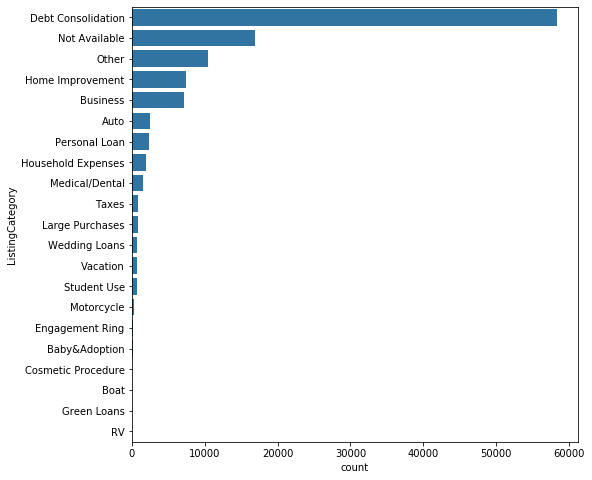

In [12]:
# The main reasons people take loans
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, y = 'ListingCategory', color = default_color, order = df_loan['ListingCategory'].value_counts().index)

plt.show()

The most frequent reason for someone taking a loan is debt consolidation.

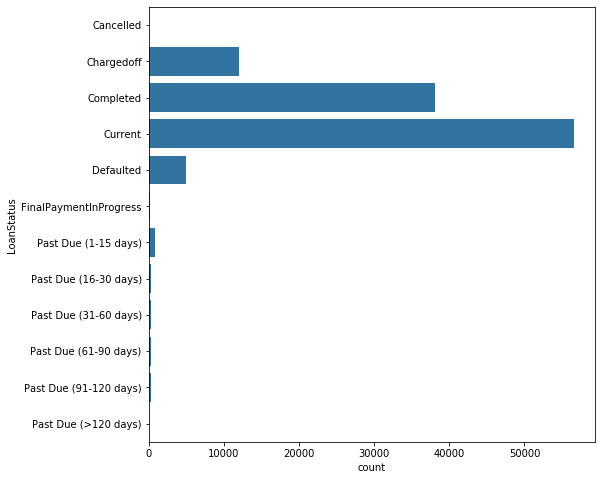

In [13]:
# First, I want to observe to distribution of loan status in the dataset.
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, y = 'LoanStatus', color = default_color)

plt.show()

It is possible to observe that the majority of loans are current and this value is followed by loans which were completed.  
It is possible to observe a considerable number of charged-off and defaulted loans.    
It is not possible to have a clean observation of past due loans, which need a closer look.

Loans that are defaulted and charged off will be directly linked to "bad payers". This is so because loans in "default" are those in which borrower is not paying for an extended period of time and loans "charged off" are no longer expected to be payed. [1]

[1] https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-

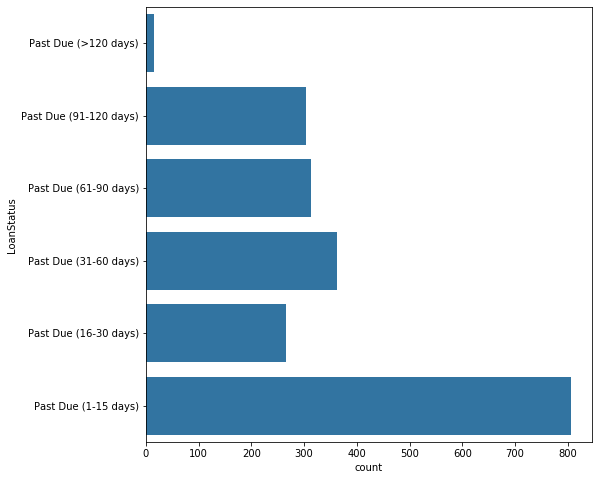

In [14]:
past_due = ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']

fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan[df_loan.LoanStatus.isin(past_due)], y = 'LoanStatus', color = default_color)
plt.ylim(5.5,11.5)
plt.show();

Here it is possible to see that majority of past due loans are within 15 days.  
As delinquents are considered to be those that exceed 30 past due days [2], therefore will be considered delinquents those with Loan Status:
* Defaulted 
* Chargedoff
* Past Due (31-60 days)
* Past Due (61-90 days)
* Past Due (91-120 days)
* Past Due (>120 days)'

[2] https://www.investopedia.com/terms/p/past-due.asp

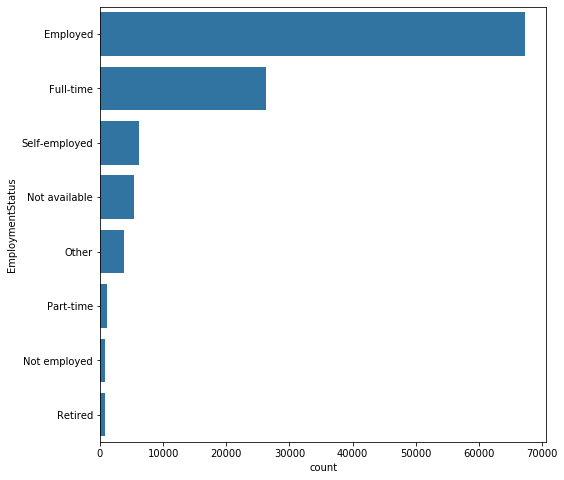

In [15]:
# Now, let's give a look in the EmploymentStatus in order to understand if borrowers have any source of money
# to pay the loan.
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, y = 'EmploymentStatus', color = default_color,  order = df_loan['EmploymentStatus'].value_counts().index)

plt.show()

Here, it is possible to noticed that majority of borrowers are employed.

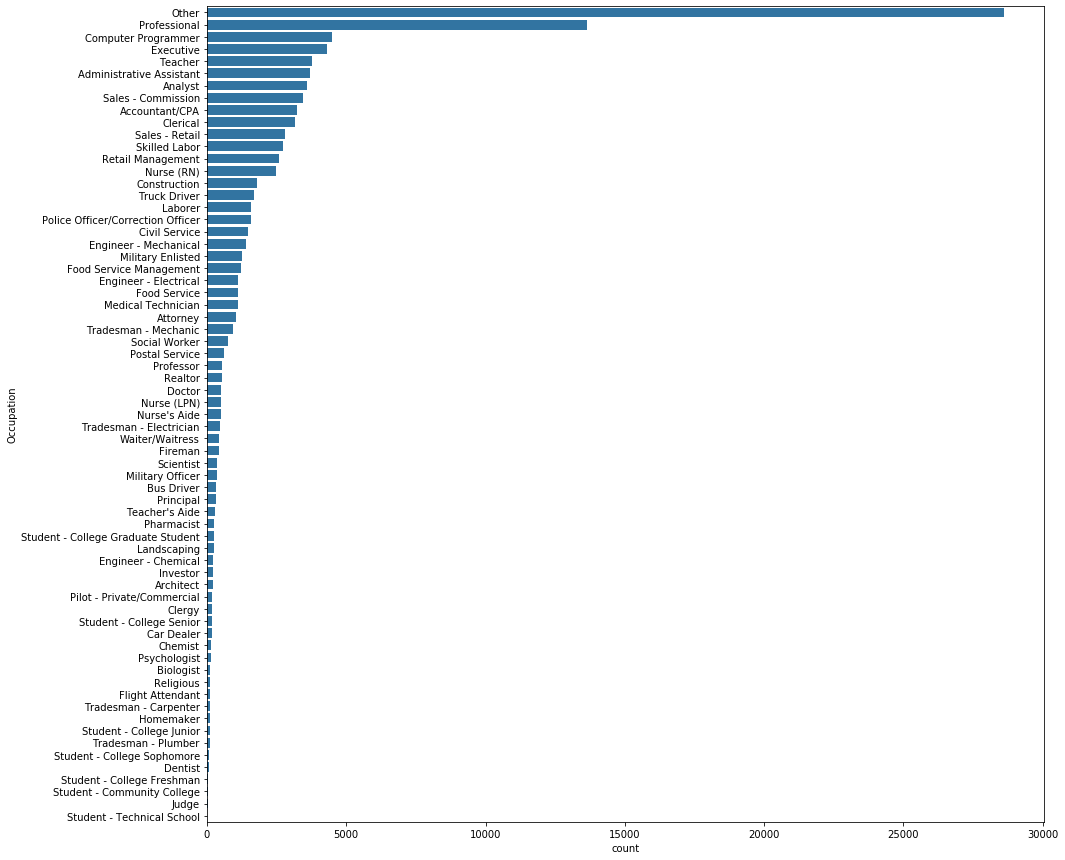

In [16]:
# Understand what are the main occupation among borrowers
fig, ax = plt.subplots(figsize = [15,15])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, y = 'Occupation', color = default_color,  order = df_loan['Occupation'].value_counts().index)
plt.show();

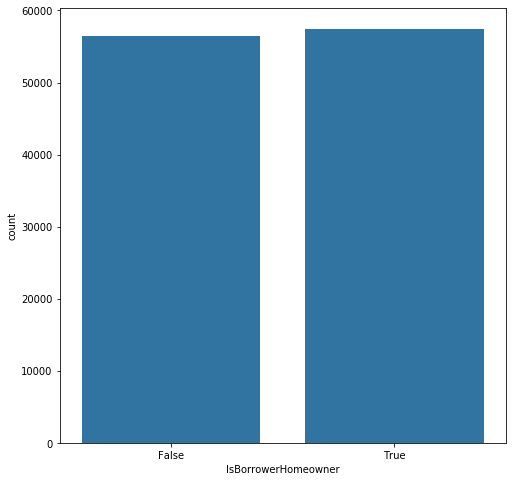

In [17]:
# Now, let's try to investigate if borrowers are homeowners, as this information could be an indication of stability 
# and a higher likelihood to pay the loan.
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'IsBorrowerHomeowner', color = default_color)

plt.show()

The number of borrowers that do and do not own a house is similar.

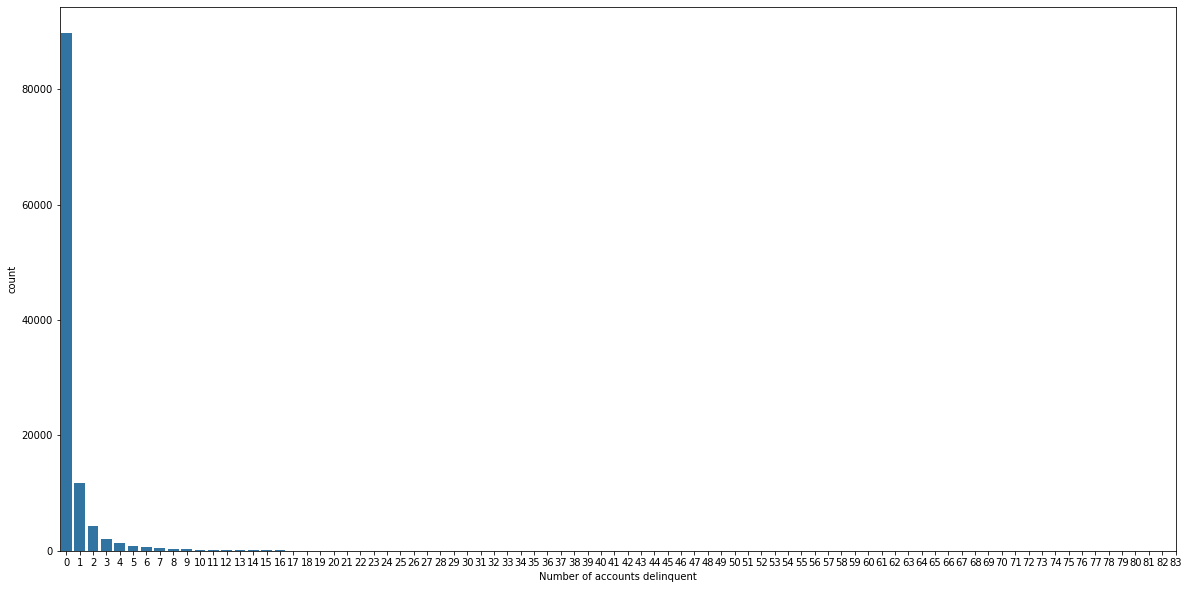

In [18]:
# Distribution of number of delinquencies each borrower has:

fig, ax = plt.subplots(figsize = [20,10])
ticks = np.arange(0, df_loan.CurrentDelinquencies.max()+1,1).astype(int)
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'CurrentDelinquencies', color = default_color)
plt.xlabel('Number of accounts delinquent')
plt.xticks(ticks, ticks)
plt.show()

In [19]:
df_loan[df_loan['CurrentDelinquencies'] > 10]

,Term,LoanStatus,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,...,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
42,36,Chargedoff,0.2900,0.2850,NaN,NaN,NaN,NaN,NaN,Not Available,...,Not available,False,14.0,NaN,3.0,0.27,Not displayed,416.666667,1500,62.86
61,36,Current,0.1274,0.1174,0.1121,0.0424,0.0697,B,8.0,Vacation,...,Employed,True,20.0,72705.0,72.0,0.03,"$75,000-99,999",7108.333333,2000,67.14
113,36,Completed,0.2900,0.2800,NaN,NaN,NaN,NaN,NaN,Not Available,...,Self-employed,False,13.0,6059.0,25.0,0.04,"$50,000-74,999",4166.666667,3000,0.00
247,36,Completed,0.1775,0.1725,NaN,NaN,NaN,NaN,NaN,Not Available,...,NaN,False,14.0,NaN,38.0,0.12,Not displayed,2666.666667,1000,27.61
252,36,Chargedoff,0.2900,0.2850,NaN,NaN,NaN,NaN,NaN,Not Available,...,Not available,False,11.0,NaN,32.0,0.09,Not displayed,2116.666667,2100,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113531,36,Defaulted,0.2000,0.1550,NaN,NaN,NaN,NaN,NaN,Not Available,...,Not available,False,16.0,NaN,7.0,0.20,Not displayed,2000.000000,1000,37.16
113576,36,Chargedoff,0.1955,0.1855,NaN,NaN,NaN,NaN,NaN,Not Available,...,Full-time,False,11.0,2310.0,25.0,0.06,"$25,000-49,999",2510.666667,1000,36.93
113598,36,Chargedoff,0.2300,0.2200,NaN,NaN,NaN,NaN,NaN,Not Available,...,Full-time,False,20.0,6371.0,11.0,0.51,"$25,000-49,999",2166.666667,1500,58.06
113804,36,Completed,0.2500,0.2400,NaN,NaN,NaN,NaN,NaN,Debt Consolidation,...,Full-time,False,23.0,38660.0,62.0,0.09,"$100,000+",13333.333333,5000,198.80


Most borrowers have no delinquent accounts.  
We can also observe that those with high number of current delinquencies are quite few compared to the total number of borrowers.

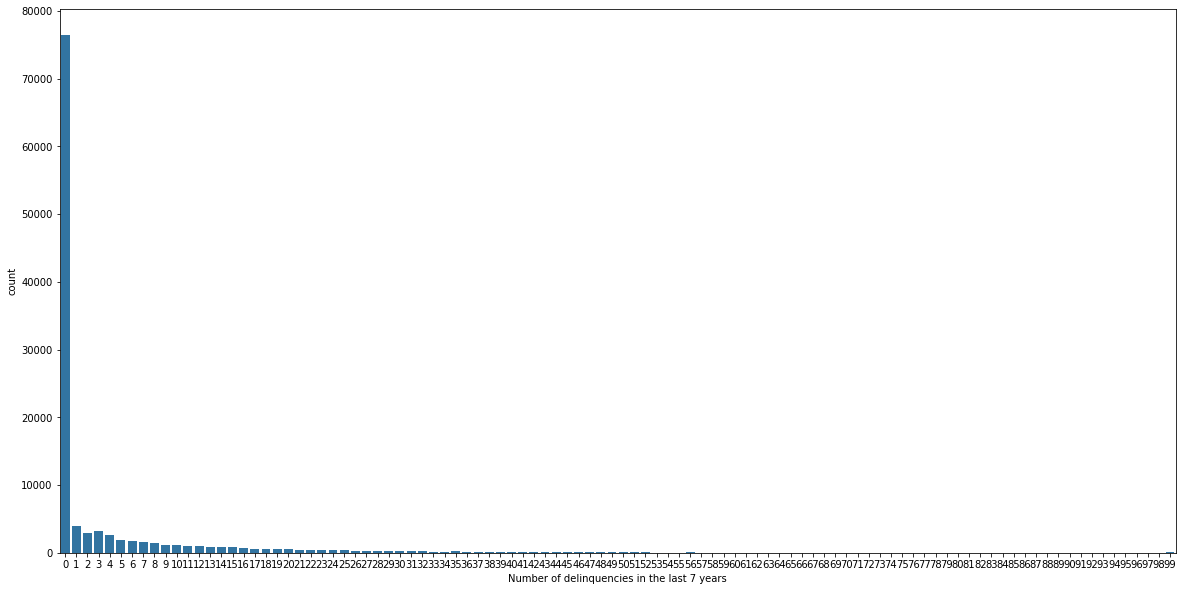

In [20]:
# Distribution of number of delinquencies in the last 7 years:

fig, ax = plt.subplots(figsize = [20,10])
ticks = np.arange(0, df_loan.DelinquenciesLast7Years.max()+1,1).astype(int)
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'DelinquenciesLast7Years', color = default_color)
plt.xlabel('Number of delinquencies in the last 7 years')
plt.xticks(ticks, ticks)
plt.show()

In [21]:
df_loan[df_loan['DelinquenciesLast7Years']!=0].DelinquenciesLast7Years.mode()

0    1.0
dtype: float64

Most borrowers have no delinquencies in the last 7 years. Accounting for only those with delinquencies, the mode is 1 delinquency in the last 7 years.

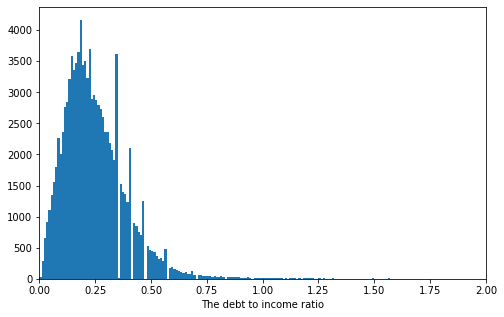

In [22]:
# Distribution of debt to income ratio
bins = np.arange(0, df_loan['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins =bins)
plt.xlabel('The debt to income ratio')
plt.xlim(0,2)
plt.show()

The debt to income ratio is right-skewed and it indicates that the majority of borrowers have a debt that is smaller than their income.

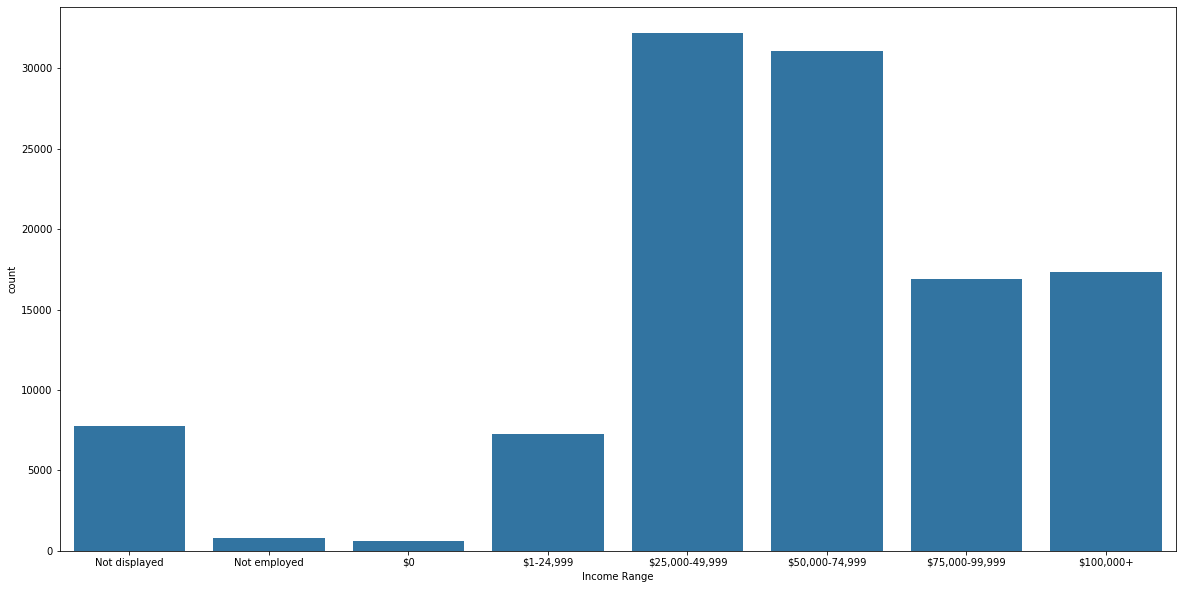

In [23]:
# Distribution of income range
fig, ax = plt.subplots(figsize = [20,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'IncomeRange', color = default_color)
plt.xlabel('Income Range')
plt.show()

Most of borrowers earn between more than \$25,000, and most of borrowers earn in range between \\$25,000 and \\$49,999.

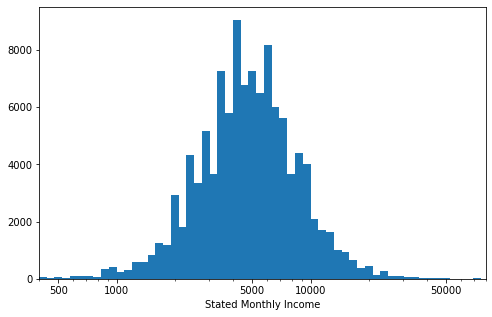

In [24]:
# Distribution of Stated Monthly Income 
x_ticks = [500, 1000, 5000, 10000, 50000, 100000]
log_binsize = 0.04
bins = 10 ** np.arange(1, np.log10(df_loan['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins =bins)
plt.xlabel('Stated Monthly Income')
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.xlim(400,80000)
plt.show()

In [25]:
print(df_loan['StatedMonthlyIncome'].mean())

5608.025568224836


The distribution looks normal distribution, with a mean monthly income of $5608.02.

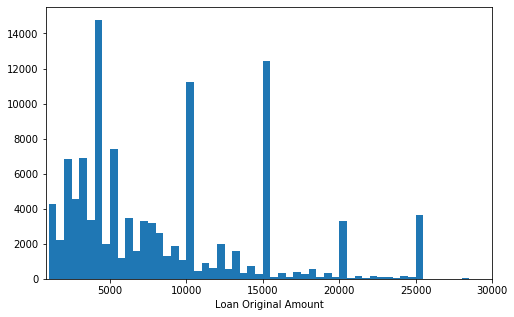

In [26]:
# Distribution of Loans initial amount:
x_ticks = [1000, 2000,4000, 10000,15000,20000]
bins = np.arange(0, df['LoanOriginalAmount'].max()+500, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins =bins)
plt.xlabel('Loan Original Amount')
plt.xlim(800,30000)
plt.show();

It is possible to notice some peaks of values in the distribution around \$4,000, \\$10,000 and \\$15,000.

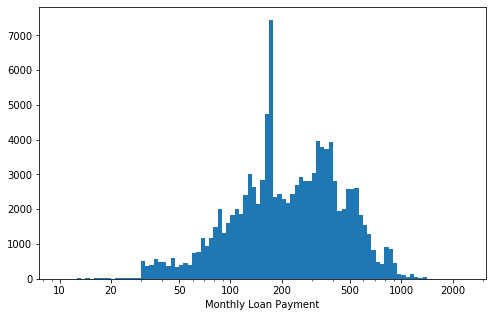

In [27]:
# Distribution of Monthly Loan Payment 
x_ticks = [10, 20, 50, 100, 200, 500, 1000, 2000]
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'MonthlyLoanPayment', bins =bins)
plt.xlabel('Monthly Loan Payment')
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.show()

In [28]:
print(df_loan['MonthlyLoanPayment'].mean())
print(df_loan['MonthlyLoanPayment'].mode())

272.47578310823104
0    173.71
dtype: float64


The distribution a little bimodal, with a peak between \$100 and \\$200.

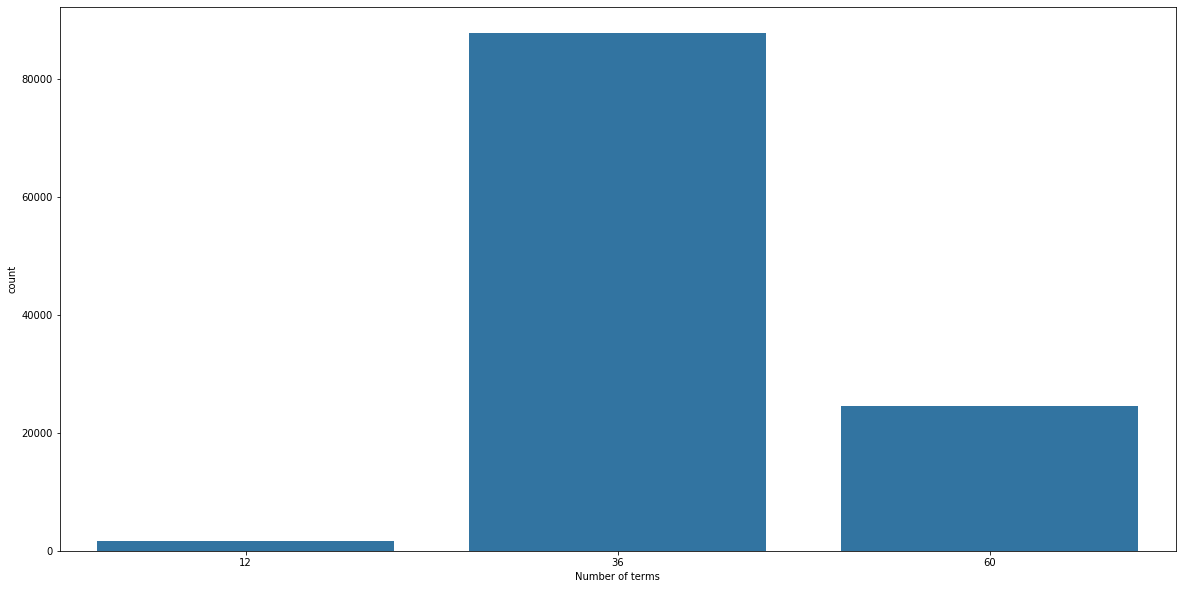

In [29]:
# Distribution of number of terms:
fig, ax = plt.subplots(figsize = [20,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'Term', color = default_color)
plt.xlabel('Number of terms')
plt.show()

Most loans are 36 months long.

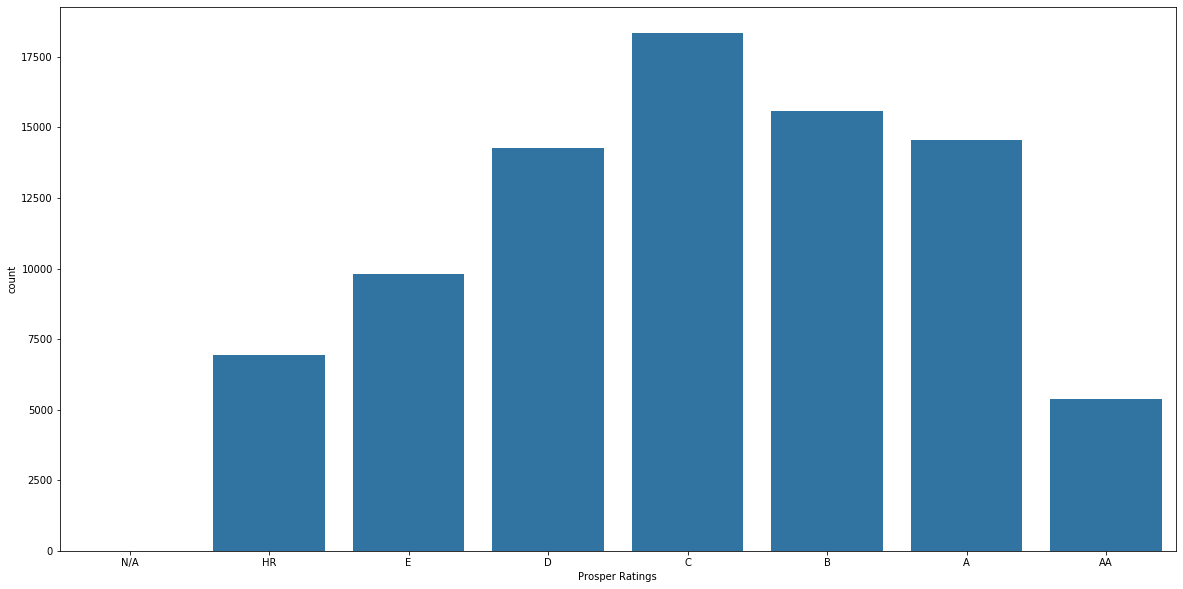

In [30]:
# Distribution of ratings
fig, ax = plt.subplots(figsize = [20,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'ProsperRating', color = default_color)
plt.xlabel('Prosper Ratings')
plt.show()

Most of loans had a rating of C. The distribution assimilates with a normal distribution.

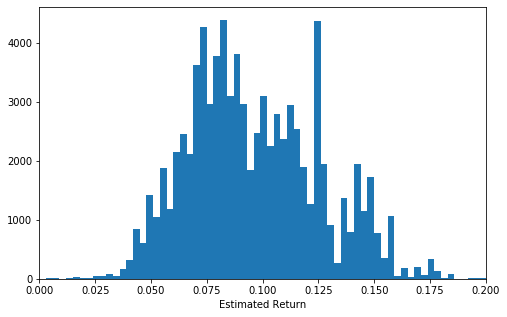

In [31]:
# Distribution of lander yield 
bins = np.arange(0, df_loan['EstimatedReturn'].max()+0.003, 0.003)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'EstimatedReturn', bins =bins)
plt.xlabel('Estimated Return')
plt.xlim(0,0.2)
plt.show()

In [32]:
print(df_loan['EstimatedReturn'].mean())
print(df_loan['EstimatedReturn'].mode())

0.09606829611209916
0    0.1246
dtype: float64


The distribution looks right-skewed, with a mean return of 9.60% and a mode of 12.46%.

As it was observed a small number of borrowers with really high delinquencies, those will be not considered during the further analysis. From here on, it will be only considered borrowers up to 15 deliquencies.

In [33]:
df_loan = df_loan[df_loan['CurrentDelinquencies'] <=15]

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The variables of interest display that most loans are current and those who do not pay have less than 5 delinquencies.
* Most borrowers have no past delinquencis in 7 years, are employed, have a low debt to income ratio, earning more than 25,000.
* The loan initial amount have peaks around \$4,000, \\$10,000 and \\$15,000, and the most frequent loan payments are between 100 and 200.

It was not observed any unusual point and log transformation was needed for income ranges. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The features investigated displayed usual distributions, however in many of them it is possible to observe some peaks. 
No operations were needed in order change data, apart from the motifications of data types in some variables.

## Bivariate Exploration


As an initial step, it will be observed the correlation between the different variables in the data.

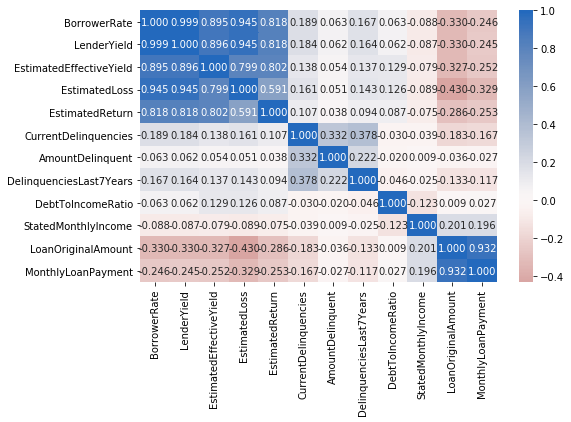

In [34]:
numeric_vars = ['BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'CurrentDelinquencies', 'AmountDelinquent',
       'DelinquenciesLast7Years', 'DebtToIncomeRatio', 
       'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars = ['Term', 'LoanStatus', 'ProsperRating', 'ProsperScore', 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner','IncomeRange',]

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [35]:
# plot matrix considers a sample of 500 loans in order to render faster
samples = np.random.choice(df_loan.shape[0], 500, replace = False)
loans_samp = df_loan.reindex(samples)

In [ ]:
g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

From the two plots above, we can clearly verify that the borrower rate is related with the lender yield (as expected).  
Also, higher rates are applied to those with more delinquencies.  
The borrower rate has a wide range for small loans (original amount), however the values tend to be lower for higher amounts.

In [ ]:
# Understand relation between LoanStatus and number of Terms
plt.figure(figsize=(15,10))
sb.countplot(data = df_loan, y = 'LoanStatus', hue = 'Term')
plt.ylabel('Loan Status')
plt.xlabel('Count')
plt.legend(framealpha = 1, title = 'Number of Terms');

In [ ]:
df_loan.Term.value_counts()

The majority of completed and current loans are of 36 terms. Current loans also have a significant amount of 60 terms loans.

In [ ]:
def cat_scatterplots(dataframe, feature_a, feature_b, feature_a_label, feature_b_label, limx_min = None, 
                     limx_max = None, limy_min = None, limy_max = None):
    plt.figure(figsize=[8, 5])
    plt.scatter(data = dataframe, x = feature_a, y = feature_b, alpha = 1/8)
    plt.xlabel(feature_a_label)
    plt.ylabel(feature_b_label)
    plt.xlim(limx_min, limx_max)
    plt.ylim(limy_min, limy_max);

In [ ]:
# Understand relation between LoanStatus and BorrowerRate
cat_scatterplots(df_loan, 'BorrowerRate', 'LoanStatus', 'Loan Status', 'Borrower Rate')

It is possible to notice that current loans have a range of rates between 0.05 and 0.35. Past due loans seem to have a higher rate, with values closer to 0.2 and 0.3.

In [ ]:
# Understand relation between LoanStatus and EmploymentStatus
plt.figure(figsize=(10,10))
sb.countplot(data = df_loan.query('LoanStatus == ["Chargedoff","Completed", "Current"]'), x = 'LoanStatus', hue = 'EmploymentStatus')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Employment Status')
plt.xlim(0.5,3.5);

Most current loans are made by employed borrowers.

In [ ]:
# Understand relation between LoanStatus and EmploymentStatus
plt.figure(figsize=(10,10))
sb.countplot(data = df_loan.query('LoanStatus != ["Chargedoff","Completed", "Current"]'), x = 'LoanStatus', hue = 'EmploymentStatus')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Employment Status')
plt.xlim(5.5,12)
plt.ylim(0,700)
plt.xticks(rotation=15);

Most past due are made by employed borrowers.

In [ ]:
# Understand relation between LoanStatus and IsBorrowerHomeowner
plt.figure(figsize=(15,10))
sb.countplot(data = df_loan, x = 'LoanStatus', hue = 'IsBorrowerHomeowner')
plt.xlabel('Loan Status')
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Homeownership');

A higher percentage of current loans are made by home owners, but the past due loans have a similar percentage of homeownership.

In [ ]:
# Understand relation between LoanStatus and CurrentDelinquencies
cat_scatterplots(df_loan, 'CurrentDelinquencies', 'LoanStatus', 'Current Delinquencies', 'Loan Status', 0, 15)

The number of current delinquencies does not seem to influence the loan payment, as there is a wide range of number of delinquencies and past due loans do not necessary have a high number.

In [ ]:
# Understand relation between LoanStatus and DelinquenciesLast7Years
cat_scatterplots(df_loan, 'DelinquenciesLast7Years', 'LoanStatus', 'Delinquencies Last 7 Years', 'Loan Status')

Similarly to the observed for the number of delinquencies, the number of delinquencies in the last 7 years have a wide range of values and do not present any special indication for the loan status.

In [ ]:
# Understand relation between LoanStatus and DebtToIncomeRatio
cat_scatterplots(df_loan, 'DebtToIncomeRatio', 'LoanStatus', 'Debt To Income Ratio', 'Loan Status',0, 1.5)

In [ ]:
default_color = sb.color_palette()[0]
sb.boxplot(data = df_loan[df_loan['DebtToIncomeRatio']<1], y = 'DebtToIncomeRatio', x = 'LoanStatus', color = default_color)
plt.xticks(rotation = 25);

The debt to income ratio does not present any special indication to the loan status.

In [ ]:
# Understand relation between LoanStatus and IncomeRange
plt.figure(figsize=(15,10))
sb.countplot(data = df_loan.query('LoanStatus == ["Chargedoff","Completed", "Current"]'), x = 'LoanStatus', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Income Range')
plt.xlim(0.5,3.5);

The majority of current loans are made by individual with an income range of \$50,000 - \\$75,999.

In [ ]:
# Understand relation between LoanStatus and IncomeRange
plt.figure(figsize=(15,10))
sb.countplot(data = df_loan.query('LoanStatus != ["Chargedoff","Completed", "Current"]'), x = 'LoanStatus', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.xticks(rotation=15)
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Income Range')
plt.xlim(5.5,12)
plt.ylim(0,280);

But if it is regarded the past due loans, most are made by individual with an income range between \$25,000 - \\$49,999.

In [ ]:
# Understand relation between LoanStatus and StatedMonthlyIncome
cat_scatterplots(df_loan, 'StatedMonthlyIncome', 'LoanStatus', 'Stated Monthly Income', 'Loan Status',0, 60000)

It is possible to notice that the past due loan are mostly made by individuals with a lower stated monthly income.

In [ ]:
# Understand relation between LoanStatus and LoanOriginalAmount
cat_scatterplots(df_loan, 'LoanOriginalAmount', 'LoanStatus', 'Loan Original Amount', 'Loan Status')

Past due loans have a high frequency in amount around \$4,000, \\$10,000 and \\$15,000.

In [ ]:
# Understand relation between LoanStatus and MonthlyLoanPayment
cat_scatterplots(df_loan, 'MonthlyLoanPayment', 'LoanStatus', 'Monthly Loan Payment', 'Loan Status', 0, 1500)

Past due loans have a high frequency of occurrences in values around monthly loan payments of 200.

In [ ]:
samples = np.random.choice(df_loan.shape[0], 1000, replace = False)
loans_samp = df_loan.reindex(samples)
categoric_vars = ['LoanStatus', 'IncomeRange', 'CurrentDelinquencies']

fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [20,20])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = loans_samp, x = var, y = 'MonthlyLoanPayment', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_xticklabels(ax[i,0].get_xticklabels(), rotation=45)
    sb.violinplot(data = loans_samp, x = var, y = 'BorrowerRate', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_xticklabels(ax[i,1].get_xticklabels(), rotation=45)
fig.tight_layout()
plt.show()

* Past due loans have monthly payments around 200 and they present higher borrowers rates.
* Higher income ranges have some higher values of monthly payment, however the most frequent values are similar for all income ranges. The most frequent values of borrower rate present a decreasing tendency as the income increases.
* The most frequent monthly payments values are similar for most number of delinquencies, however those with zero delinquencies present higher monthly payments. The borrower rate has an increasing trend according to the number of delinquencies up to 4 delinquencies.

In [ ]:
plt.figure(figsize=(15,10))
sb.countplot(data = df_loan, x = 'CurrentDelinquencies', hue = 'EmploymentStatus')
plt.xlabel('Current deliquencies')
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Employment status')
plt.xlim(-0.5,5.5)
plt.ylim(0,60000);

The plot is a little messy, but we are interested in those with 0 delinquencies, which means the ones that have everything payed. Analyzing the plot, it is possible to observe that the majority people with 0 delinquencies are those employed, full-time and self-employed.
This confirms the initial hypothesis that having a job is a high indication that the person is likely to pay the loan.

In [ ]:
plt.figure(figsize=(15,10))
sb.countplot(data = df_loan, x = 'CurrentDelinquencies', hue = 'IsBorrowerHomeowner')
plt.xlabel('Current deliquencies')
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Home ownership')
plt.xlim(-0.5,5.5);

This plot depicts that home ownership is has almost the same percentage among those with no delinquencies. Again, this probably means that home ownership has no influence on wether someone will pay or not the loan.

In [ ]:
def cat_regplots(dataframe, feature_a, feature_b, feature_a_label, feature_b_label, limx_min = None, 
                     limx_max = None, limy_min = None, limy_max = None):
    plt.figure(figsize=[8, 5])
    sb.regplot(data = dataframe, x = feature_a, y = feature_b, fit_reg = False,
               x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha': 1/8})
    plt.xlabel(feature_a_label)
    plt.ylabel(feature_b_label)
    plt.xlim(limx_min, limx_max)
    plt.ylim(limy_min, limy_max);

In [ ]:
# Understand the relation between number of delinquencies and borrower rate
cat_regplots(df_loan, 'BorrowerRate', 'CurrentDelinquencies', 'Borrower Rate', 'Current Delinquencies',  
                 limy_min = 0, limy_max = 15)

Individuals with no delinquencies have a wide range of rates. However, as the number of delinquencies increases, the rate tends to be higher.

In [ ]:
# Understand the relation between number of delinquencies and loan amount
cat_regplots(df_loan, 'LoanOriginalAmount', 'CurrentDelinquencies', 'Loan Amount', 'Current Delinquencies',  
                 limy_min = 0, limy_max = 15)

It is possible to notice a higher frequency of higher loan amounts for the individuals with a smaller number of current delinquencies.

In [ ]:
# Understand a possible relation between the number of delinquencies and income
cat_regplots(df_loan, 'StatedMonthlyIncome', 'CurrentDelinquencies', 'Stated Monthly Income', 'Current Delinquencies',  
                 limx_min = 0, limx_max = 30000, limy_min = 0, limy_max = 15)

It is possible to observe that higher the income, smaller the number of delinquencies tend to be.

In [ ]:
# Understand the variation if there is any link between a specific prosper rating with smaller number of deliquencies
plt.figure(figsize=(15,10))
sb.countplot(data = df_loan, x = 'CurrentDelinquencies', hue = 'ProsperRating')
plt.xlabel('Current Delinquencies')
plt.ylabel('Count')
plt.legend(framealpha = 1, title = 'Prosper Rating')
plt.xlim(-0.5,5.5);

It is possible to notice that individual with no delinquencies have all different  ratings. However, there is a higher number of individuals with rating C, B and A.

In [ ]:
# Understand the variation of amount deliquent according to the income
cat_regplots(df_loan, 'StatedMonthlyIncome', 'AmountDelinquent', 'Stated Monthly Income', 'Amount Delinquent',  
                 limx_min = 0, limx_max = 30000, limy_min = 0, limy_max = 15000)

In the previous plot we can observe again that those individuals with smaller income are the ones with a higher amount delinquent.

In [ ]:
# Understand the variation of Monthly Loan Payment according to the Stated Monthly Income
plt.hist2d(data = df_loan[(df_loan['StatedMonthlyIncome']<10000)&(df_loan['MonthlyLoanPayment']<2000)], x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Stated Monthly Income')
plt.ylabel('Monthly Loan Payment')
plt.xlim(0,10000);

It is possible to notice that there is a high frequency of individual with a monthly income between \\$2000 and \\$3000 who pay a value up to \\$200.

In [ ]:
# Understand the variation of Lender Yield according to the Loan Original Amount
cat_scatterplots(df_loan, 'LenderYield', 'LoanOriginalAmount', 'Lender Yield', 'Loan Original Amount',  
                 limx_min = 0, limx_max = 0.35)

The lender yield seems to be higher for loan amounts smaller than $10,000.

In [ ]:
# Understand the income monthly payment distrbution according to the income range
plt.figure(figsize=(15,10))
base_color = sb.color_palette()[3]
sb.violinplot(data = df_loan, x = 'IncomeRange', y = 'MonthlyLoanPayment', color = base_color, inner='quartile')
plt.xlabel('Income Range')
plt.ylabel('Monthly Loan Payment');

Those with a higher income range have a higher mean monthly loan payment. Also, it is possible to notice an increase in the monthly loan payment as the income range increases.

In [ ]:
# Understand the income monthly payment distrbution according to the Stated Monthly Income
x_ticks = [500, 1000, 5000, 10000,20000, 50000,100000]
plt.figure(figsize=[8, 5])
plt.scatter(data = df_loan, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment',  alpha = 1/8)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Monthly Loan Payment')
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.xlim(500,100000);

The same pattern as before can be observed if the stated monthly income is regarded instead of income range. There is an increase in the monthly loan payment as the stated monthly income rises. Also, it is possible to notice a higher number of loans with monthly payment bellow $500 for the majority of stated monthly incomes.

In [ ]:
# Understand the Debt To Income Ratio distribution according to the Stated Monthly Income
x_ticks = [500, 1000, 5000, 10000,20000, 50000,100000]
plt.figure(figsize=[8, 5])
plt.scatter(data = df_loan, x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio',  alpha = 1/8)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Debt To Income Ratio')
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.xlim(500,100000)
plt.ylim(0,4);

It is possible to notice a negative trend between debt to income ratio and stated monthly income. This means that people with higher income usually have a loan value that is less significant when compared to their total income.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


Analyzing the previous plots, it is possible to notice that loans of 36 terms are the ones which are mostly completed and current. This could possibly be an indication of the status, however as it is the option with higher number of borrowers, it is not possible to state without any further investigation. Other factors that seem not to imply the loan status are the employment status and homeownership. Both "current" and "past due" loans are mainly made by employed individuals and homeownership is not highly predominant in any loan status.  

The number of current delinquencies and delinquencies in the past seven years take a wide range of values and does not present any specific relation to the loan status. The debt to income ratio does not present any special relationship with the loan status, but the income range which is more common in the the "past due" loans is the range between \$25,000 - \\$49,999, indicating that lower income might be an indication of the loan status. The latter is confirmed with the analysis of the distribution of the stated monthly income, in which is noticed a higher presence of individuals with lower income with a "past due" loan.  

Also, it was possible to notice that loans have higher borrowers rates for those that are "past due". Another interesting fact is that "past due" loans have a high frequency of loans amount of \\$4,000, \\$10,000 and \\$15,000, and the most frequent monthly loan payments are around \\$200.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Some interesting and expected relationships were confirmed: a higher number of delinquencies implies in a higher borrower rate, higher income ranges present higher values of monthly loan payment, higher the incomes tend to have a smaller  number of delinquencies. Also, the majority of individuals with 0 delinquencies are those employed, full-time and self-employed, indicating that employment could influence the payment of the loan. This fact is reinforced by 
those individuals with smaller income presenting higher delinquent amounts.   

Also, as expected, it is possible to notice a higher frequency of higher loan amounts by individuals who have a smaller number of current delinquencies, and it is possible to notice a negative trend between debt to income ratio and stated monthly income, meaning that people with higher income usually ask for a loan amount that is less significant to their total income value.   

Differently from what was supposed in the beginning, homeownership has no influence on wether someone will pay or not the loan, and the lender yield seems to be higher for loan amounts smaller than \\$10,000, indicating that higher loan amounts do not lead to higher yields.

## Multivariate Exploration

In the multivariate explaration, my main objective in to explore the relation between Loan Status, Borrower Rate, Income Range, Loan Orignal Amount and Monthly Loan Payment.

In [ ]:
# Creating a new dataframe composed of LoanStatus of interest
df_loan_stat = df_loan.copy()
df_loan_stat['LoanStatus'] = df_loan_stat['LoanStatus'].astype('str')
stat = ['Completed','Current', 'Past Due (1-15 days)','Past Due (16-30 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)']
df_loan_stat = df_loan_stat.loc[df_loan_stat['LoanStatus'].isin(stat)]
df_loan_stat['LoanStatus'] = df_loan_stat['LoanStatus'].astype('category')

In [ ]:
df_loan_stat.to_csv('Prosper_loan_clean.csv',index=False)

In [ ]:
# Understand the relation between LoanStatus, LoanOriginalAmount and BorrowerRate
g = sb.FacetGrid(data = df_loan_stat, col = 'LoanStatus', size = 4, col_wrap = 4)
g.map(plt.scatter, 'BorrowerRate','LoanOriginalAmount', alpha = 1/8)
g.set_ylabels('Loan Original Amount')
g.set_xlabels('Borrower Rate')
g.set_titles('{col_name}');

It is possible to observe the completed and current loans have original amounts and borrower rates in a wide range of values. However, if regarded the past due loans, it is possible to observe a higher frequency of loans around \$4,000, \\$10,000 and \\$15,000 and higher rates, around 0.3.

In [ ]:
# Understand the relation between LoanStatus, MonthlyLoanPayment and BorrowerRate
g = sb.FacetGrid(data = df_loan_stat, col = 'LoanStatus', size = 4, col_wrap = 4)
g.map(plt.scatter, 'BorrowerRate','MonthlyLoanPayment', alpha = 1/8)
g.set_ylabels('Monthly Loan Payment')
g.set_xlabels('Borrower Rate')
g.set_titles('{col_name}');

It is possible to notice that for current and completed loans there s an increasing trend between borrower rate and monthly loan payment. This trend can be observed in past due loans, however it is less intense. Also, it is possible to notice that past due loans usually have lower monthly loan payments and rates around 0.3.

In [ ]:
# Understand the relation between LoanStatus, MonthlyLoanPayment and LoanOriginalAmount
g = sb.FacetGrid(data = df_loan_stat, col = 'LoanStatus', size = 4, col_wrap = 4)
g.map(plt.scatter, 'LoanOriginalAmount','MonthlyLoanPayment', alpha = 1/8)
g.set_xlabels('Loan Original Amount')
g.set_ylabels('Monthly Loan Payment')
g.set_titles('{col_name}');

As expected, higher loan original amounts have higher monthly payments. Another noticeable fact is that past due loans have lower loan original amount values.

In [ ]:
# Understand the relation between LoanStatus, IncomeRange and LoanOriginalAmount
plt.figure(figsize=[15,5])
sb.boxplot(data = df_loan_stat, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=20)
plt.legend(title = 'Income Range', loc =0);

It is verified an increasing trend in the median of loan original amounts as the income range increases. This pattern can be observed in most loans status. 

In [ ]:
# Understand the relation between LoanStatus, BorrowerRate and IncomeRange
plt.figure(figsize=[15,5])
sb.boxplot(data = df_loan_stat, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=20)
plt.legend(title = 'Income Range', loc =0);

It is verified a decreasing trend in the borrower rate as the income range increases. We can also observe higher median borrower rates for past due loans and that this rate is higher for the income range \$1 - \\$24,999 with loans past due over 60 days.

In [ ]:
# Understand the relation between LoanStatus, MonthlyLoanPayment and IncomeRange
plt.figure(figsize=[15,5])
sb.boxplot(data = df_loan_stat, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.ylabel('Monthly Loan Payment')
plt.xticks(rotation=20)
plt.ylim(0,1500)
plt.legend(title = 'Income Range', loc =0);

It is verified an increasing trend in the median monthly loan payment for increasing income ranges. It is also possible to verify that past due loans have lower monthly loan payments.

Another interesting fact to be pointed out on the last three plots is that the Income range classified as "Not displayed" is only present in "Completed and "Past Due (>120 days)".

In [ ]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_loan_stat, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Monthly Loan Payments across Income Ranges and Loan Status')
plt.ylabel('Monthly Loan Payments ($)')
plt.xticks(rotation=35)
plt.show();

Again, it is verified an increasing central tendency between the monthly loan payments and higher income ranges. It is also noticeable a high variability in the monthly payment for past due loans.

In [ ]:
# Understand the realtion between MonthlyLoanPayment, LoanOriginalAmount and BorrowerRate
plt.figure(figsize = (8,7))
plt.scatter(data = df_loan_stat, y = 'LoanOriginalAmount', x = 'MonthlyLoanPayment', c = 'BorrowerRate', alpha = 1/2)
plt.colorbar(label = 'Borrower Rate')
plt.ylabel('Loan Original Amount')
plt.xlabel('Monthly Loan Payment');

It is possible to observe an increasing tendency between loan original amount and monthly loan payment. An interesting feature is that higher borrower rates are observed in loans with lower original amounts and, consequently, monthly payments.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I continued the investigation of factors which might influence the loan stauts by regarding the influence of borrower rate, income range, loan original amount and monthly loan payment on it. The multivariate exploration showed that while completed and current loans have original amounts and borrower rates in a wide range of value, past due loans have a higher frequency of loans around \$4,000, \\$10,000 and \\$15,000 and rates around 0.3. Also, in current and completed loans is possible to observe an increasing trend between borrower rate and monthly loan payment, which can also be observed in past due loans, however they are less intense. Another interesting point is that past due loans usually have lower monthly loan payments and rates around 0.3. As expected, higher loan original amounts had higher monthly payments. Another noticeable fact is that past due loans have lower loan original amount values.


### Were there any interesting or surprising interactions between features?

There was an increasing trend in the median of loan original amounts as the income range increases, which was observed for most loan status. Another increasing trend was verified in the median monthly loan payment when compared to the income ranges. In this comparisson, past due loans presented lower monthly loan payments. Also, there was a decreasing trend in the borrower rate as the income range increases.  
It was interesting to verify that there are higher median borrower rates for past due loans and that this rate is higher for the income range \\$1 - \\$24,999 with loans past due over 60 days. Another interesting fact is that higher borrower rates are observed in loans with lower original amounts and, consequently, monthly payments.
